# Traffic Violation Analysis 2 #

Importing necessary modules and libraries.

In [2]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading the CSV file provided.

In [3]:
traffic_violation_df = pd.read_csv('./myPython3/trainFile/Traffic_Violations.csv')

/home/user/Documents/stackRoute/myPython3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Converting all the column name spaces to '_' for easier access with dot convention.

In [4]:
traffic_violation_df.columns = traffic_violation_df.columns.str.replace(' ','_')

Converting the Description column to upper case for identifying the categories easily.

In [5]:
traffic_violation_df['Description'] = traffic_violation_df.Description.str.upper()

Adding a 'violation_year' column to the dataFrame from the datetime column.

In [6]:
traffic_violation_df['violation_year'] = pd.to_datetime(traffic_violation_df['Date_Of_Stop']).dt.year

Defining a function that will create various catergories of violations based on keywords found from the Description column

In [7]:
def add_col(row):
    speed_offence = ['SPEED', 'RECKLESS', 'LIMIT', 'CARELESS']
    seatbelt_offence = ['SEAT BELT','SEATBELT']
    license_issue = ['LICENSE', 'REGISTRATION','UNREGISTERED', 'LEARNER', 'PERMIT']
    traffic_rules = ['TRAFFIC', 'RED','STOP','SIGNAL', 'Stop']
    light_issues = ['TINT', 'LIGHT', 'LAMP', 'ILLUMINATION']
    driving_issues = [ 'DRIVING', 'DRIVER', 'LEFT', 'RIGHT' , 'WAY']
    if any(x in row for x in speed_offence):
        return "SPEEDING OFFENCE"
    elif any(x in row for x in license_issue):
        return "LICENSE OR REGISTRATION ISSUE"
    elif(row.find('ALCOHOL') != -1):
        return "DRUNK DRIVE"
    elif any(x in row for x in traffic_rules):
        return "TRAFFIC RULES BREAK"
    elif any(x in row for x in seatbelt_offence):
        return "SEALBELT ISSUE"
    elif any(x in row for x in light_issues):
        return "LIGHTING ISSUE"
    elif(row.find('LANE') != -1):
        return "LANE CHANGE OFFENSE"
    elif(row.find('PHONE') != -1):
        return "USING PHONE WHILE DRIVING"
    elif any(x in row for x in driving_issues):
        return "DRIVING WRONG WAY"
    else:
        return "OTHERS"

Creating a new 'violation_category' column from the description column.

In [8]:
traffic_violation_df['violation_category']=traffic_violation_df.Description.astype(str).apply (lambda row: add_col(row))

## Plotting the various types of violations. ##

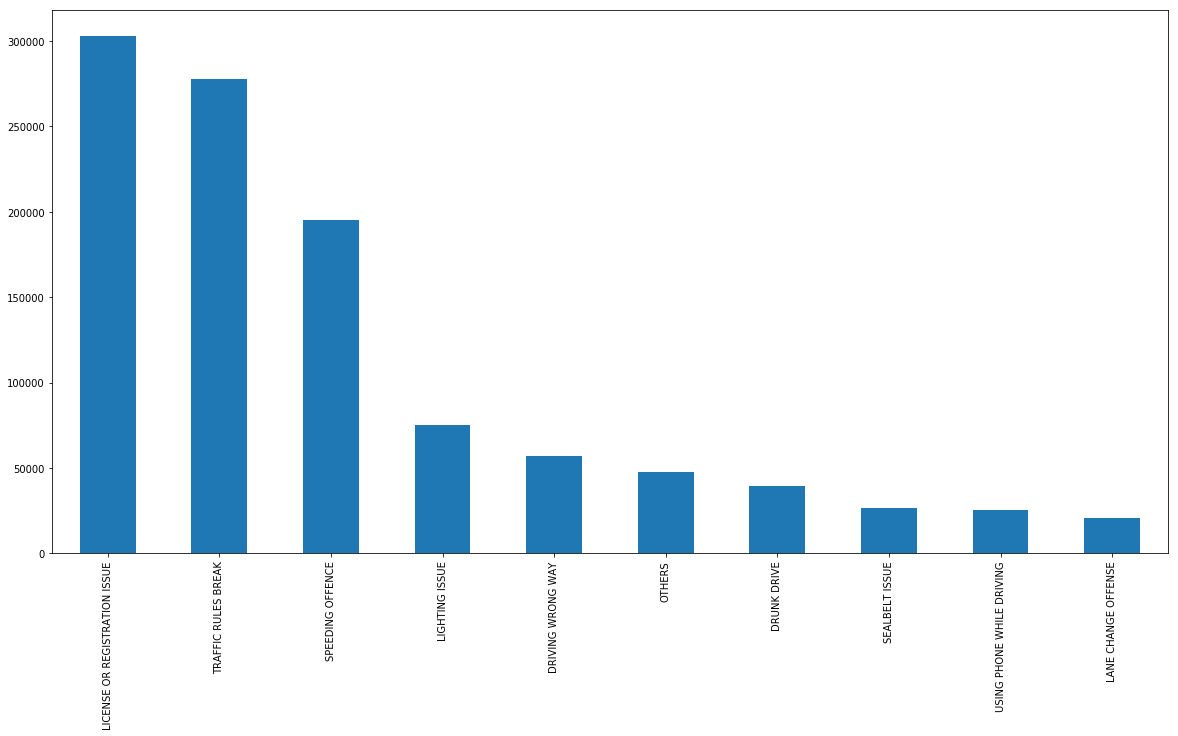

In [22]:
traffic_violation_df['violation_category'].value_counts().plot(kind = 'bar', figsize = (20,10))

From the above graph, one can see 'Licence or Registration issue', 'Traffic Rule Violation'  and 'Speeding offence' are the most common violations.

## Ploting the various types of violations that led to accident ##

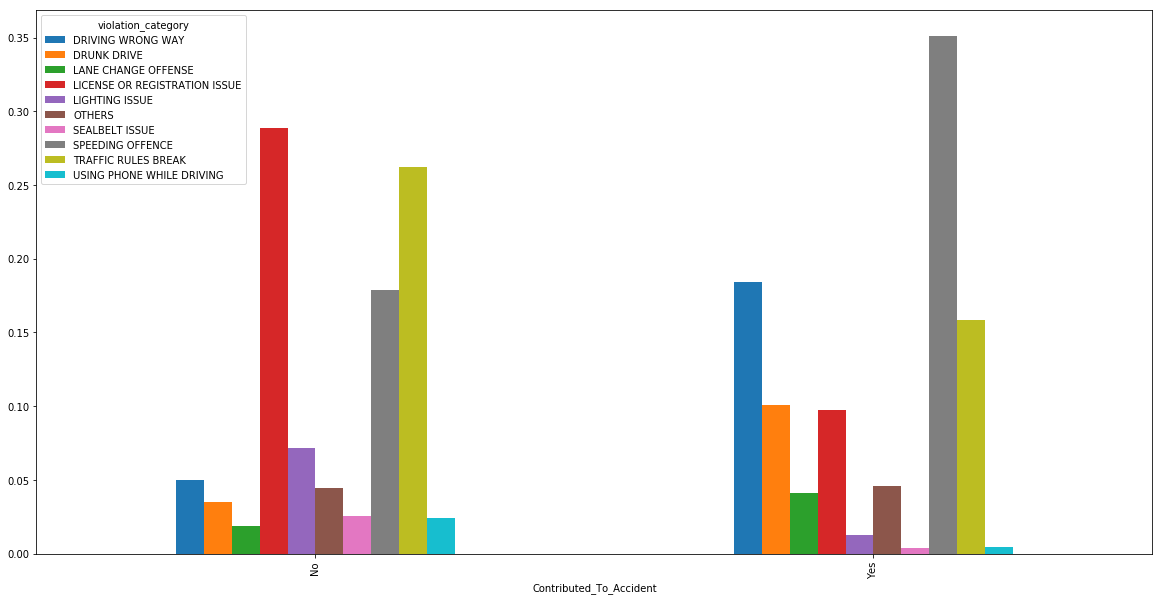

In [20]:
traffic_violation_df.groupby('Contributed_To_Accident').violation_category.value_counts(normalize=True).unstack().plot(kind = 'bar',figsize=(20,10))

From the above graph, one can see 'Speeding' , 'Wrong way driving' and 'drunk drive' are the main causes that leads to accidents.

## Plotting the viloation types based on Gender ##

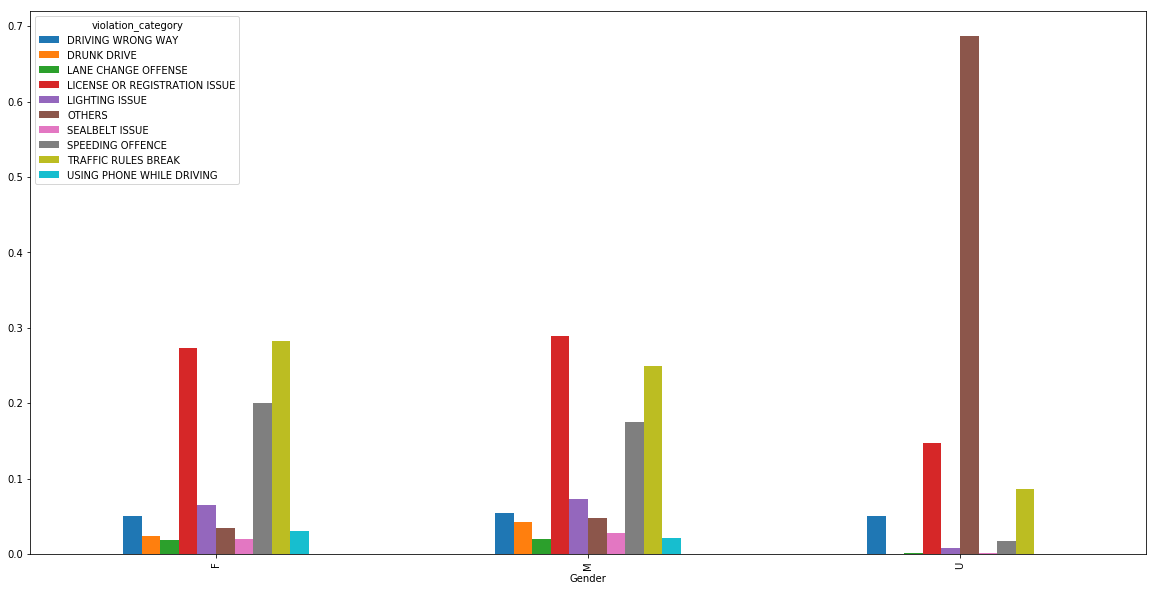

In [19]:
traffic_violation_df.groupby('Gender').violation_category.value_counts(normalize=True).unstack().plot(kind = 'bar',figsize=(20,10))

## Plotting the violation types based on Races ##

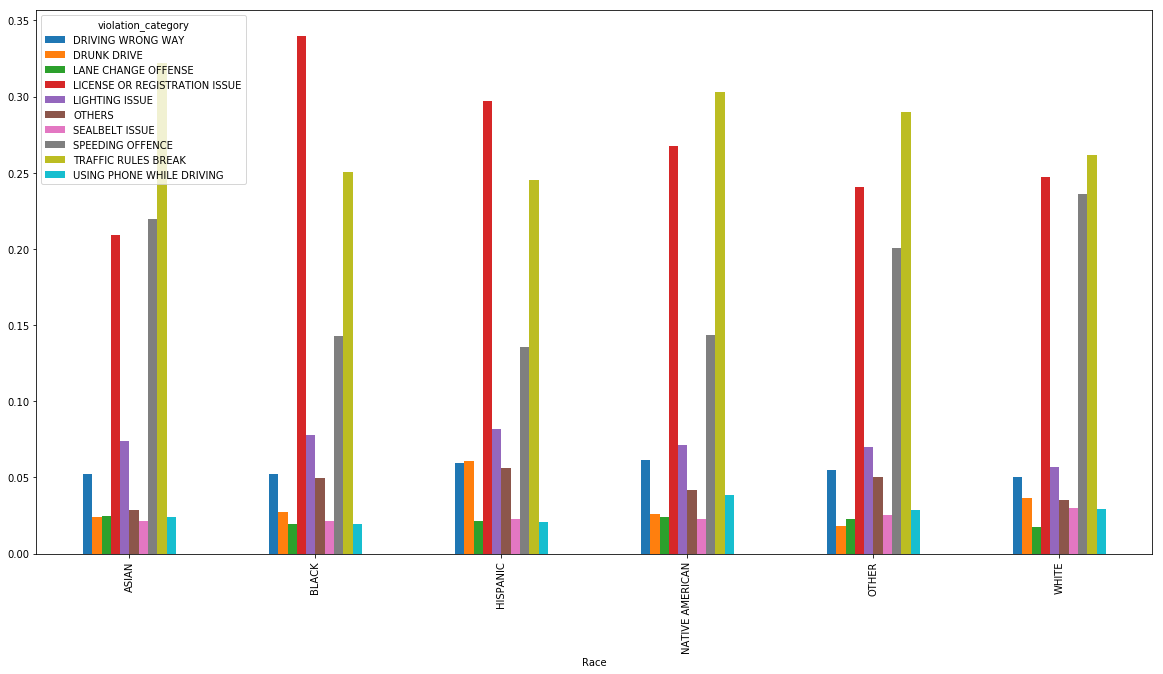

In [18]:
traffic_violation_df.groupby('Race').violation_category.value_counts(normalize=True).unstack().plot(kind = 'bar',figsize=(20,10))